In [1]:
# Analysis project for anime dataset
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [2]:
# loading the anime dataset
anime_df = pd.read_csv('anime-dataset-2023.csv')
anime_df.head()

,anime_id,Name,English name,Score,Genres,Type,Episodes,Aired,Premiered,Status,...,Licensors,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members
0,1,Cowboy Bebop,Cowboy Bebop,8.75,"Action, Award Winning, Sci-Fi",TV,26,"Apr 3, 1998 to Apr 24, 1999",spring 1998,Finished Airing,...,"Funimation, Bandai Entertainment",Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41,43,78525,914193,1771505
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,8.38,"Action, Sci-Fi",Movie,1,"Sep 1, 2001",UNKNOWN,Finished Airing,...,Sony Pictures Entertainment,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189,602,1448,206248,360978
2,6,Trigun,Trigun,8.22,"Action, Adventure, Sci-Fi",TV,26,"Apr 1, 1998 to Sep 30, 1998",spring 1998,Finished Airing,...,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328,246,15035,356739,727252
3,7,Witch Hunter Robin,Witch Hunter Robin,7.25,"Action, Drama, Mystery, Supernatural",TV,26,"Jul 3, 2002 to Dec 25, 2002",summer 2002,Finished Airing,...,"Funimation, Bandai Entertainment",Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764,1795,613,42829,111931
4,8,Bouken Ou Beet,Beet the Vandel Buster,6.94,"Adventure, Fantasy, Supernatural",TV,52,"Sep 30, 2004 to Sep 29, 2005",fall 2004,Finished Airing,...,Illumitoon Entertainment,Toei Animation,Manga,23 min per ep,PG - Children,4240,5126,14,6413,15001


In [15]:
# EDA on the datasets
#EDA on anime-datset-2023
anime_df.info()

# Check for duplicate rows
duplicate_rows = anime_df[anime_df.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

# Check for missing values in each column
missing_values = anime_df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Summary statistics for numerical columns
summary_stats = anime_df.describe()
print("Summary Statistics:")
print(summary_stats)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   anime_id     24905 non-null  int64  
 1   Name         24905 non-null  object 
 2   Score        24905 non-null  float64
 3   Genres       24905 non-null  object 
 4   Type         24905 non-null  object 
 5   Episodes     24905 non-null  float64
 6   Premiered    24905 non-null  object 
 7   Status       24905 non-null  object 
 8   Studios      24905 non-null  object 
 9   Source       24905 non-null  object 
 10  Rating       24905 non-null  object 
 11  Rank         24905 non-null  float64
 12  Popularity   24905 non-null  int64  
 13  Favorites    24905 non-null  int64  
 14  Scored By    24905 non-null  float64
 15  Members      24905 non-null  int64  
 16  duration     24905 non-null  object 
 17  engage_rate  24905 non-null  float64
dtypes: float64(5), int64(4), object(9)
memory usag

   anime_id                             Name             English name Score  \
0         1                     Cowboy Bebop             Cowboy Bebop  8.75   
1         5  Cowboy Bebop: Tengoku no Tobira  Cowboy Bebop: The Movie  8.38   
2         6                           Trigun                   Trigun  8.22   
3         7               Witch Hunter Robin       Witch Hunter Robin  7.25   
4         8                   Bouken Ou Beet   Beet the Vandel Buster  6.94   

                                 Genres   Type Episodes  \
0         Action, Award Winning, Sci-Fi     TV       26   
1                        Action, Sci-Fi  Movie        1   
2             Action, Adventure, Sci-Fi     TV       26   
3  Action, Drama, Mystery, Supernatural     TV       26   
4      Adventure, Fantasy, Supernatural     TV       52   

                          Aired    Premiered           Status  ...  \
0   Apr 3, 1998 to Apr 24, 1999  spring 1998  Finished Airing  ...   
1                   Sep 1, 200

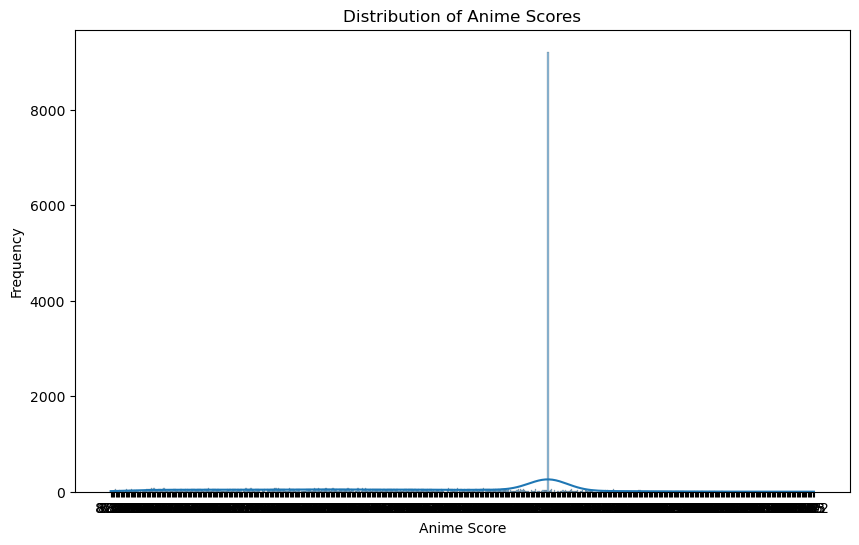

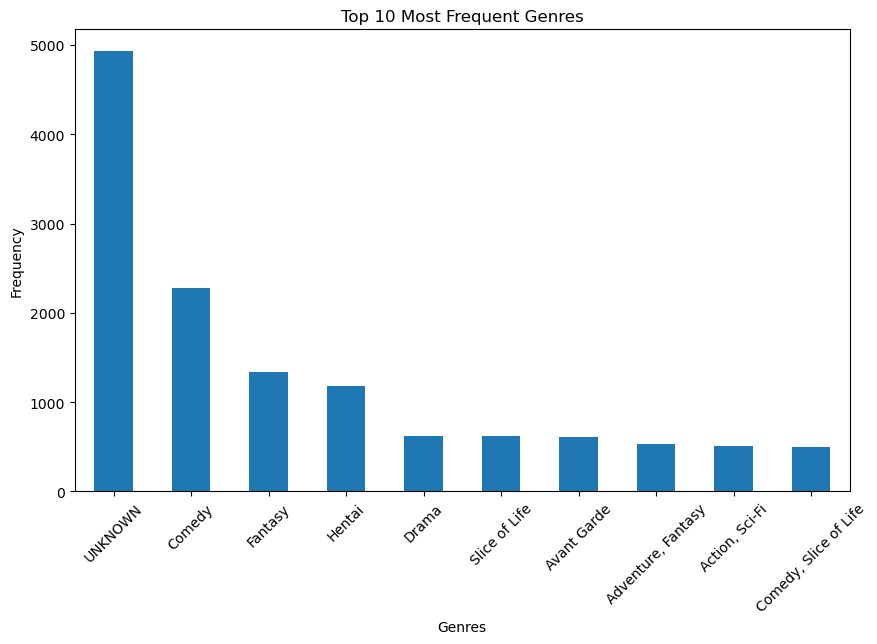

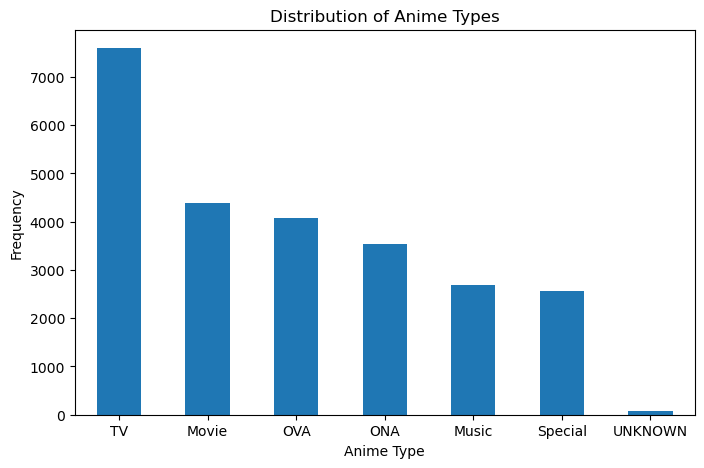

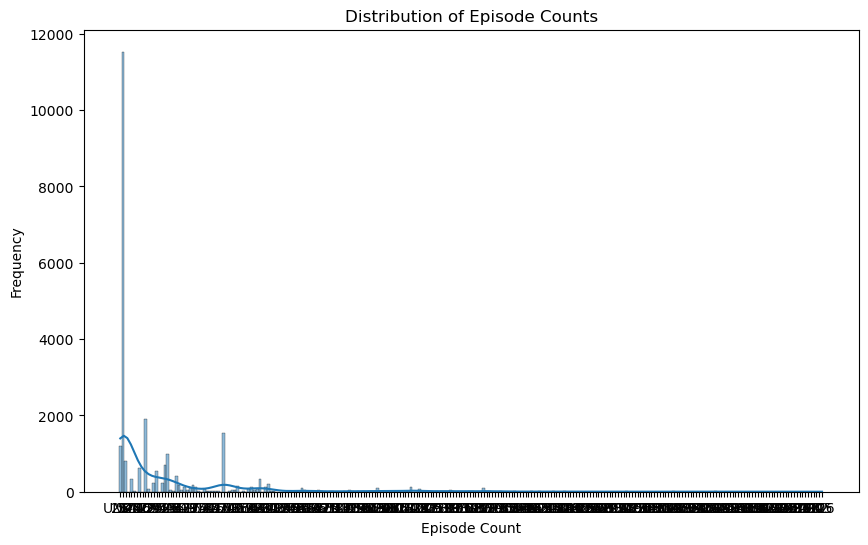

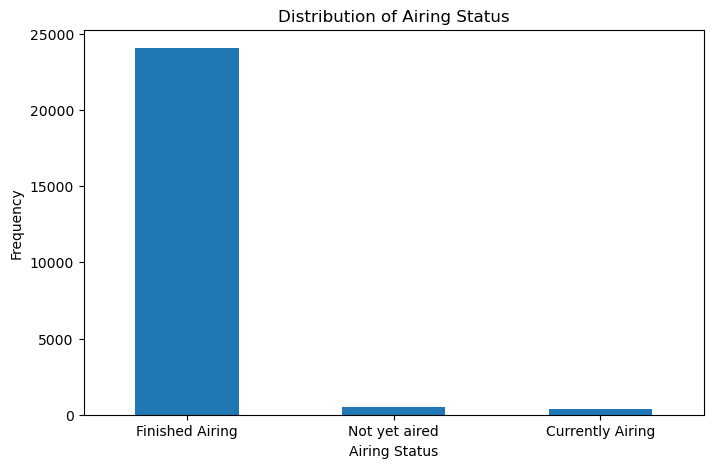

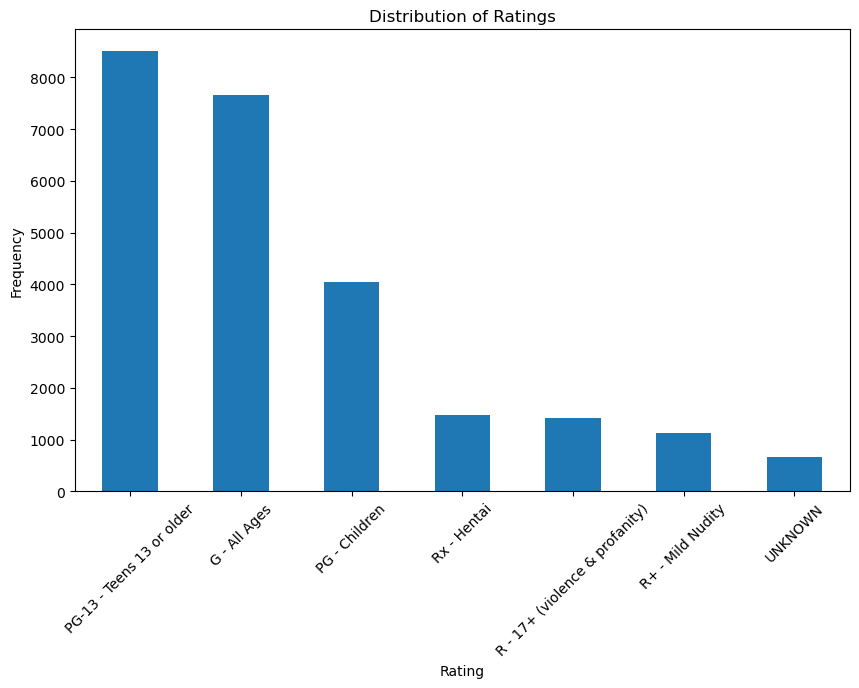

In [4]:
# Display the first few rows of the dataset
print(anime_df.head())

# Distribution of Anime Scores
plt.figure(figsize=(10, 6))
sns.histplot(anime_df['Score'], bins=15, kde=True)
plt.xlabel('Anime Score')
plt.ylabel('Frequency')
plt.title('Distribution of Anime Scores')
plt.show()

# Genre Analysis
genres_count = anime_df['Genres'].value_counts().head(10)
plt.figure(figsize=(10, 6))
genres_count.plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Genres')
plt.xticks(rotation=45)
plt.show()

# Anime Types
type_counts = anime_df['Type'].value_counts()
plt.figure(figsize=(8, 5))
type_counts.plot(kind='bar')
plt.xlabel('Anime Type')
plt.ylabel('Frequency')
plt.title('Distribution of Anime Types')
plt.xticks(rotation=0)
plt.show()

# Episode Count Analysis
plt.figure(figsize=(10, 6))
sns.histplot(anime_df['Episodes'], bins=30, kde=True)
plt.xlabel('Episode Count')
plt.ylabel('Frequency')
plt.title('Distribution of Episode Counts')
plt.show()

# Airing Status
status_counts = anime_df['Status'].value_counts()
plt.figure(figsize=(8, 5))
status_counts.plot(kind='bar')
plt.xlabel('Airing Status')
plt.ylabel('Frequency')
plt.title('Distribution of Airing Status')
plt.xticks(rotation=0)
plt.show()

# Rating Analysis
rating_counts = anime_df['Rating'].value_counts()
plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.xticks(rotation=45)
plt.show()


In [18]:
# cleaning the anime dataset
# changing the 'UNKNOWN' to NA with NaN
anime_df.replace('UNKNOWN', np.nan, inplace=True)

#converting columns data types
anime_df['Score'] = anime_df['Score'].astype(float)

cols_to_convert = ['Episodes', 'Rank','Scored By'] # list of columns to convert

for col in cols_to_convert:
    anime_df[col] = pd.to_numeric(anime_df[col], errors='coerce')  # Coerce converts NaN to NaN for non-convertible values
    
# dropping irrelevant columns
anime_df.drop(columns = ["English name", "Aired", "Producers", "Licensors"], inplace = True)

# handling missing values through imputation
# Impute missing values for numerical columns (floats and integers) with mean
num_cols = ['Score', 'Episodes', 'Rank', 'Scored By']
num_imputer = SimpleImputer(strategy='mean')  # Use mean imputation
anime_df[num_cols] = num_imputer.fit_transform(anime_df[num_cols])

# Impute missing values for categorical columns (objects) with mode
cat_cols = ['Genres', 'Type', 'Premiered', 'Studios', 'Rating']
cat_imputer = SimpleImputer(strategy='most_frequent')  # Use mode imputation
anime_df[cat_cols] = cat_imputer.fit_transform(anime_df[cat_cols])

#splitting the duration column for clean up
anime_df[["duration","to drop"]]= anime_df['Duration'].str.split("per",expand=True)
anime_df.drop(columns=["Duration", "to drop"], inplace = True)


In [6]:
anime_df.head()

,anime_id,Name,Score,Genres,Type,Episodes,Premiered,Status,Studios,Source,Rating,Rank,Popularity,Favorites,Scored By,Members,duration
0,1,Cowboy Bebop,8.75,"Action, Award Winning, Sci-Fi",TV,26.0,spring 1998,Finished Airing,Sunrise,Original,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,24 min
1,5,Cowboy Bebop: Tengoku no Tobira,8.38,"Action, Sci-Fi",Movie,1.0,spring 2017,Finished Airing,Bones,Original,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,1 hr 55 min
2,6,Trigun,8.22,"Action, Adventure, Sci-Fi",TV,26.0,spring 1998,Finished Airing,Madhouse,Manga,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,24 min
3,7,Witch Hunter Robin,7.25,"Action, Drama, Mystery, Supernatural",TV,26.0,summer 2002,Finished Airing,Sunrise,Original,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,25 min
4,8,Bouken Ou Beet,6.94,"Adventure, Fantasy, Supernatural",TV,52.0,fall 2004,Finished Airing,Toei Animation,Manga,PG - Children,4240.0,5126,14,6413.0,15001,23 min


Average genre popularity in descending order:
  Genres
Action, Drama, Horror, Mystery, Sci-Fi, Suspense    22318.00
Action, Avant Garde, Sci-Fi                         22144.00
Avant Garde, Suspense                               21842.00
Comedy, Horror, Sci-Fi                              21787.75
Drama, Fantasy, Sports                              21770.00
Name: Popularity, dtype: float64
Average genre scores in descending order:
  Genres
Action, Adventure, Award Winning, Fantasy          8.670000
Award Winning, Drama, Sports                       8.620000
Award Winning, Mystery, Sci-Fi, Supernatural       8.610000
Adventure, Mystery, Slice of Life, Supernatural    8.608333
Award Winning, Fantasy, Slice of Life              8.580000
Name: Score, dtype: float64
Average genre ranks in descending order:
  Genres
Avant Garde, Mystery                             19955.0
Adventure, Fantasy, Gourmet                      19643.5
Fantasy, Romance, Slice of Life, Supernatural    19512.0
Award W

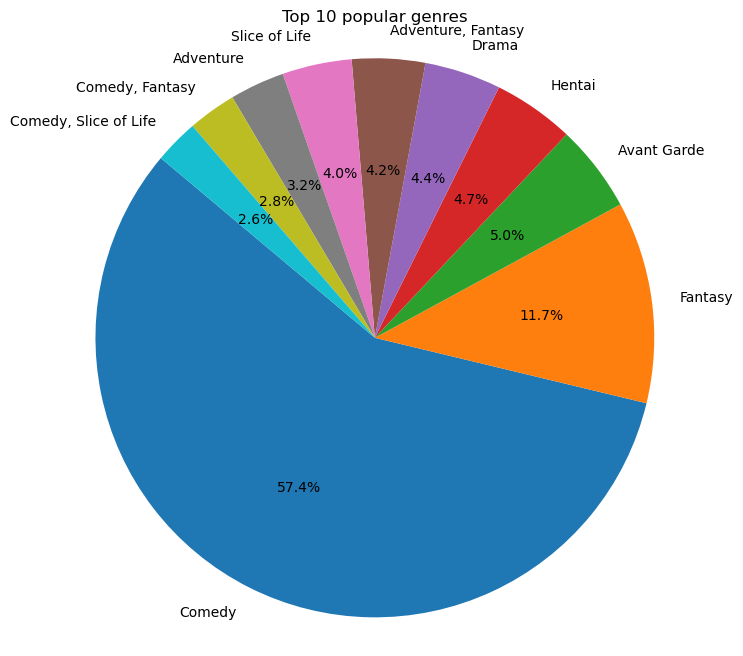

In [27]:
# Running analysis on the clean dataset to investigate the following:

#1. Genre analysis and popular trends
# looking at top 5 highest averages
genre_popularity = anime_df.groupby('Genres')['Popularity'].mean().sort_values(ascending=False)
print("Average genre popularity in descending order:\n ",genre_popularity.head())

genre_scores = anime_df.groupby('Genres')['Score'].mean().sort_values(ascending=False)
print("Average genre scores in descending order:\n ",genre_scores.head())

genre_rank = anime_df.groupby('Genres')['Rank'].mean().sort_values(ascending=False)
print("Average genre ranks in descending order:\n ", genre_rank.head())

# Genre popularity analysis
# Calculate the total popularity for each genre
genre_popularity = anime_df.groupby('Genres')['Popularity'].sum().reset_index()

# Sort genres by popularity (optional)
genre_popularity = genre_popularity.sort_values(by='Popularity', ascending=False)

# Select the top 10 genres by popularity
top_genres = genre_popularity.head(10)

# Plotting a pie chart for top 10 genre popularity
plt.figure(figsize=(8, 8))
plt.pie(top_genres['Popularity'], labels=top_genres['Genres'], autopct='%1.1f%%', startangle=140)
plt.title('Top 10 popular genres')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

<AxesSubplot:>

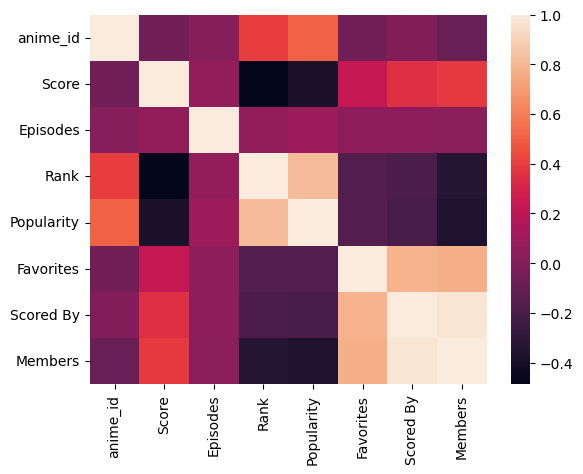

In [8]:
# look at correlation
corr = anime_df.select_dtypes("number").corr()
sns.heatmap(corr)

In [9]:
#3. Studios impact
# looking at top 5 highest averages
studio_popularity = anime_df.groupby('Studios')['Popularity'].mean().sort_values(ascending=False)
print("Average studio popularity in descending order:\n ",studio_popularity.head())

studio_scores = anime_df.groupby('Studios')['Score'].mean().sort_values(ascending=False)
print("Average studio scores in descending order:\n ",studio_scores.head())

studio_rank = anime_df.groupby('Studios')['Rank'].mean().sort_values(ascending=False)
print("Average studio ranks in descending order:\n ", studio_rank.head())



Average studio popularity in descending order:
  Studios
CloverWorks, Studio Kai    24672.0
Hu Po Donghua              24655.5
Youku                      24654.0
Slow Studio                23169.8
Sankaku                    23095.0
Name: Popularity, dtype: float64
Average studio scores in descending order:
  Studios
K-Factory, Kitty Film Mitaka Studio           9.02
Pierrot, Studio Signpost                      8.78
Toei Animation, DandeLion Animation Studio    8.62
Madhouse, Satelight, Graphinica               8.35
Gainax, Tatsunoko Production                  8.35
Name: Score, dtype: float64
Average studio ranks in descending order:
  Studios
Keyring            20048.0
Fever Creations    20043.0
Ice Butter         20037.0
Starry Cube        20034.0
SJYNEXCUS          20029.0
Name: Rank, dtype: float64


Status popularity in descending order:
  Status
Finished Airing     296915054
Not yet aired         4304342
Currently Airing      4250101
Name: Popularity, dtype: int64


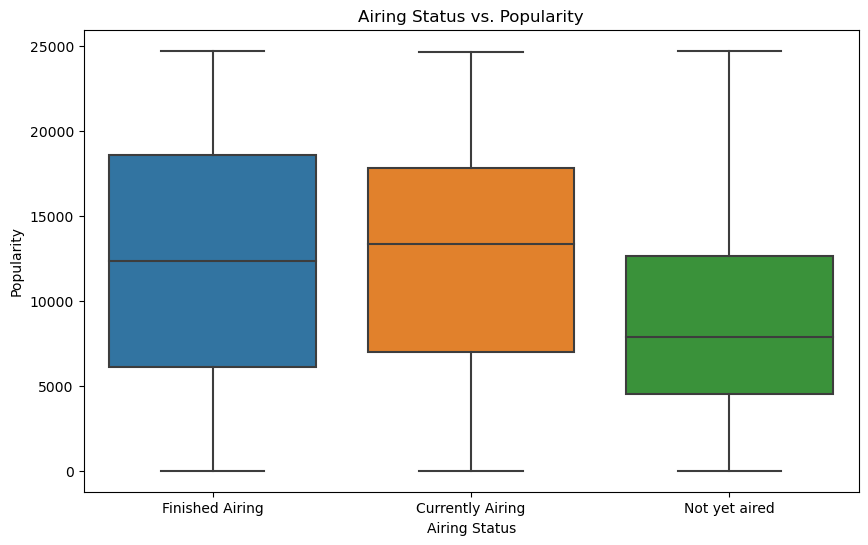

In [10]:
#4.How airing status affects popularity
studio_popularity = anime_df.groupby('Status')['Popularity'].sum().sort_values(ascending=False)
print("Status popularity in descending order:\n ",studio_popularity.head())

# Set the figure size
plt.figure(figsize=(10, 6))
# Create a box plot to visualize status against popularity
sns.boxplot(x='Status', y='Popularity', data=anime_df)
    # Add labels and title
plt.xlabel('Airing Status')
plt.ylabel('Popularity')
plt.title('Airing Status vs. Popularity')
plt.show()# Show the plot

In [11]:
#adding a feature where we look at engagement rate (rate of members actually scoring the anime)
engagement_rate = anime_df['Scored By'] / anime_df['Members']
anime_df['engage_rate'] = (engagement_rate * 100).round(2)


In [12]:
anime_df.head()

,anime_id,Name,Score,Genres,Type,Episodes,Premiered,Status,Studios,Source,Rating,Rank,Popularity,Favorites,Scored By,Members,duration,engage_rate
0,1,Cowboy Bebop,8.75,"Action, Award Winning, Sci-Fi",TV,26.0,spring 1998,Finished Airing,Sunrise,Original,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,24 min,51.61
1,5,Cowboy Bebop: Tengoku no Tobira,8.38,"Action, Sci-Fi",Movie,1.0,spring 2017,Finished Airing,Bones,Original,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,1 hr 55 min,57.14
2,6,Trigun,8.22,"Action, Adventure, Sci-Fi",TV,26.0,spring 1998,Finished Airing,Madhouse,Manga,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,24 min,49.05
3,7,Witch Hunter Robin,7.25,"Action, Drama, Mystery, Supernatural",TV,26.0,summer 2002,Finished Airing,Sunrise,Original,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,25 min,38.26
4,8,Bouken Ou Beet,6.94,"Adventure, Fantasy, Supernatural",TV,52.0,fall 2004,Finished Airing,Toei Animation,Manga,PG - Children,4240.0,5126,14,6413.0,15001,23 min,42.75


      Type     Score          Rank    Popularity    Favorites     Scored By  \
0    Movie  6.360127  10828.322690  13426.331203   188.379137  25332.591037   
1    Music  6.094107   9745.682799  16674.077811     3.213701  13925.535140   
2      ONA  6.193789  11420.003958  14191.519955    47.868384  16766.887777   
3      OVA  6.249334   9831.493157   9933.961237    58.681796  12278.093686   
4  Special  6.368793   8762.998810  10213.566458    24.912432  13109.958796   
5       TV  6.653273   9336.645060  11094.563681  1234.236866  59354.398187   

        Members  
0  23074.907327  
1    976.727103  
2   7047.844325  
3  13513.580226  
4  14427.167318  
5  91708.811107  


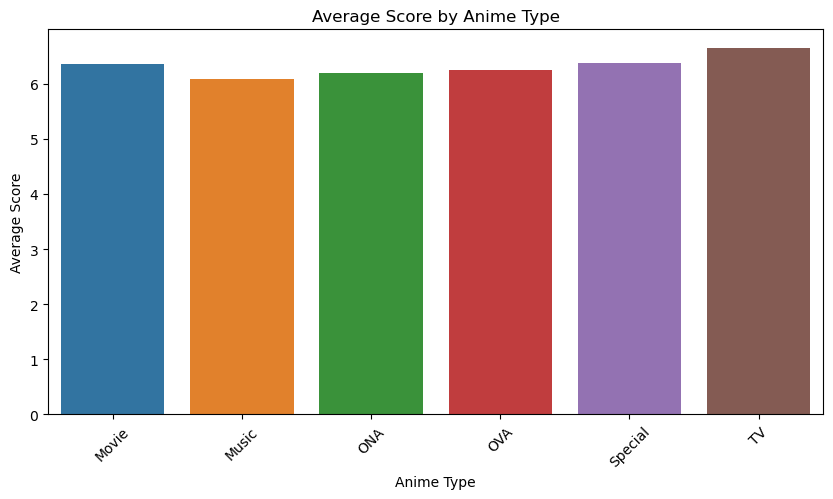

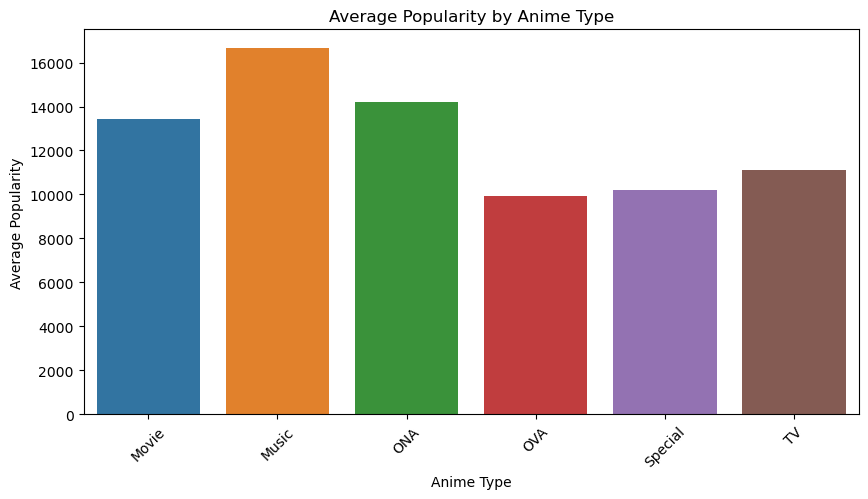

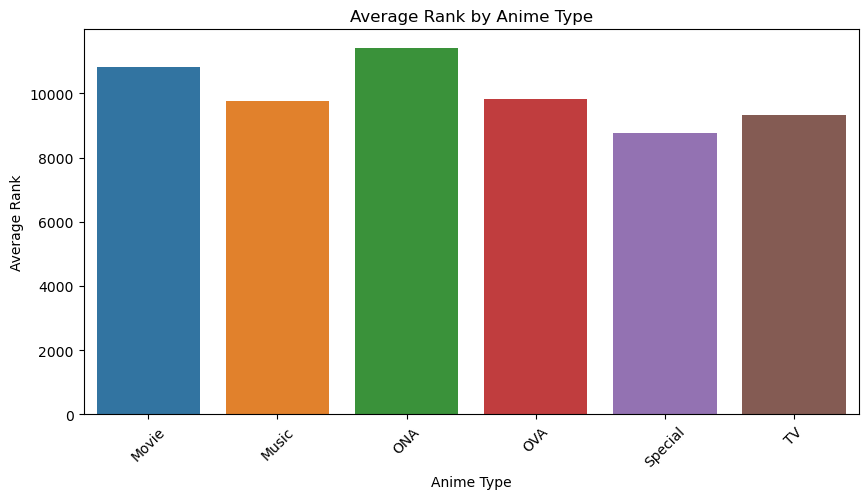

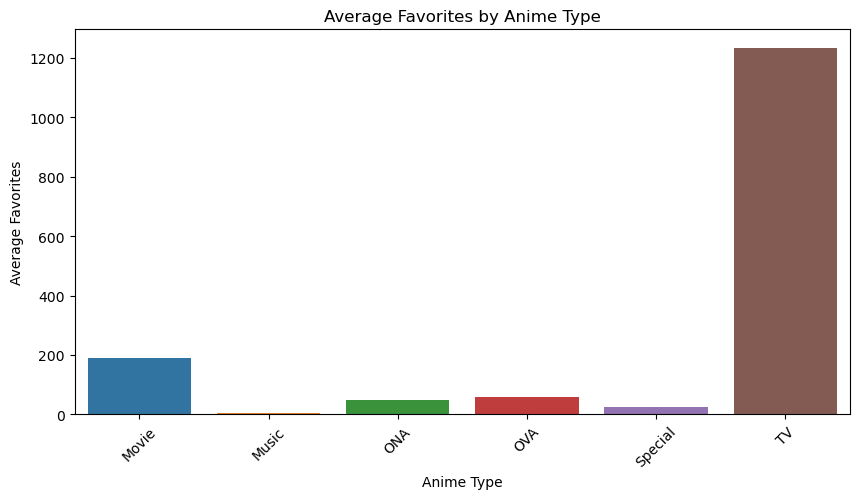

In [13]:
#6. comparative analysis
# Group by anime type and calculate aggregate metrics
type_grouped = anime_df.groupby('Type').agg({
    'Score': 'mean',
    'Rank': 'mean',
    'Popularity': 'mean',
    'Favorites': 'mean',
    'Scored By': 'mean',
    'Members': 'mean'
}).reset_index()

print(type_grouped)

#visualizing comparative metrics
# Comparing average ratings by anime type
plt.figure(figsize=(10, 5))
sns.barplot(x='Type', y='Score', data=type_grouped)
plt.xlabel('Anime Type')
plt.ylabel('Average Score')
plt.title('Average Score by Anime Type')
plt.xticks(rotation=45)
plt.show()

# Comparing average popularity by anime type
plt.figure(figsize=(10, 5))
sns.barplot(x='Type', y='Popularity', data=type_grouped)
plt.xlabel('Anime Type')
plt.ylabel('Average Popularity')
plt.title('Average Popularity by Anime Type')
plt.xticks(rotation=45)
plt.show()

# Comparing average rank by anime type
plt.figure(figsize=(10, 5))
sns.barplot(x='Type', y='Rank', data=type_grouped)
plt.xlabel('Anime Type')
plt.ylabel('Average Rank')
plt.title('Average Rank by Anime Type')
plt.xticks(rotation=45)
plt.show()

# Comparing average favorites by anime type
plt.figure(figsize=(10, 5))
sns.barplot(x='Type', y='Favorites', data=type_grouped)
plt.xlabel('Anime Type')
plt.ylabel('Average Favorites')
plt.title('Average Favorites by Anime Type')
plt.xticks(rotation=45)
plt.show()

          Source     Score          Rank    Popularity    Favorites  \
0   4-koma manga  6.626307   6841.891245   7056.464968   458.098726   
1           Book  6.414968  11677.798640  14800.890052    25.989529   
2      Card game  6.320922   7606.985294   8342.058824    76.852941   
3           Game  6.322716   8924.554119  10196.982955    85.814935   
4    Light novel  6.904712   5063.044131   3603.364669  1737.953512   
5          Manga  6.778600   6293.546711   6711.844677  1226.404950   
6    Mixed media  6.422312   8827.150290  10230.327160   103.604938   
7          Music  5.812134   9491.428445  14081.465823    27.637975   
8          Novel  6.635868   7848.274438  10225.524683   436.258110   
9       Original  6.234680  11588.138583  15607.122012   183.162752   
10         Other  6.200255  12105.999548  14497.488095    60.152778   
11  Picture book  6.268085  14376.502957  16985.633333     3.876190   
12         Radio  5.722397  12047.071429  14023.428571     2.857143   
13    

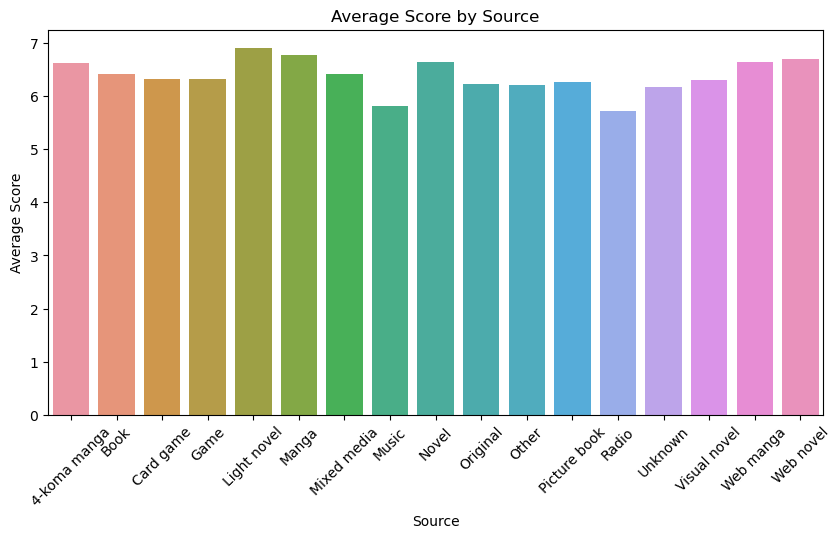

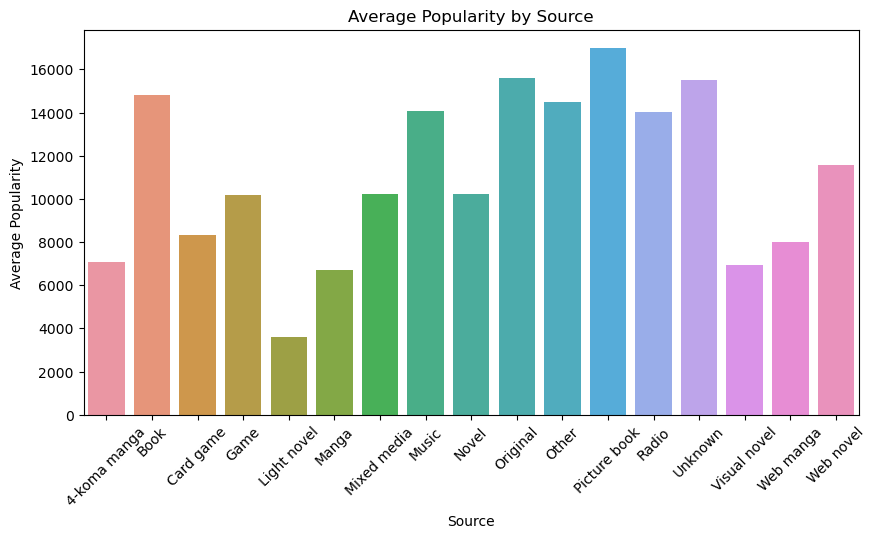

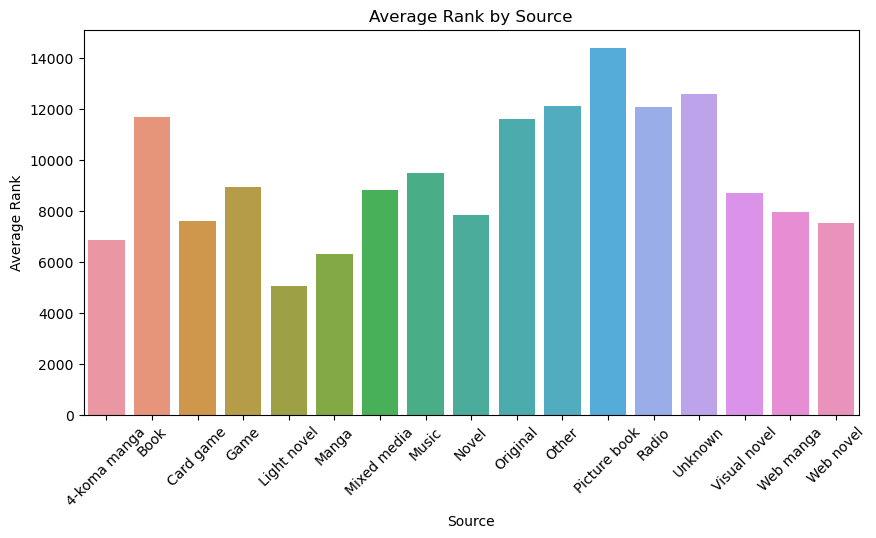

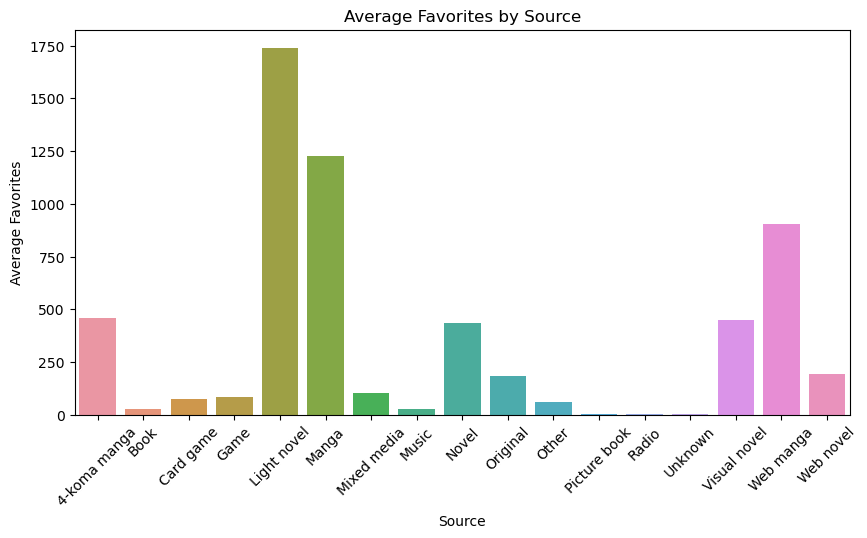

In [29]:
# Group by anime source and calculate aggregate metrics
type_grouped = anime_df.groupby('Source').agg({
    'Score': 'mean',
    'Rank': 'mean',
    'Popularity': 'mean',
    'Favorites': 'mean',
    'Scored By': 'mean',
    'Members': 'mean'
}).reset_index()

print(type_grouped)

#visualizing comparative metrics
# Comparing average ratings by anime type
plt.figure(figsize=(10, 5))
sns.barplot(x='Source', y='Score', data=type_grouped)
plt.xlabel('Source')
plt.ylabel('Average Score')
plt.title('Average Score by Source')
plt.xticks(rotation=45)
plt.show()

# Comparing average popularity by anime type
plt.figure(figsize=(10, 5))
sns.barplot(x='Source', y='Popularity', data=type_grouped)
plt.xlabel('Source')
plt.ylabel('Average Popularity')
plt.title('Average Popularity by Source')
plt.xticks(rotation=45)
plt.show()

# Comparing average rank by anime type
plt.figure(figsize=(10, 5))
sns.barplot(x='Source', y='Rank', data=type_grouped)
plt.xlabel('Source')
plt.ylabel('Average Rank')
plt.title('Average Rank by Source')
plt.xticks(rotation=45)
plt.show()

# Comparing average favorites by anime type
plt.figure(figsize=(10, 5))
sns.barplot(x='Source', y='Favorites', data=type_grouped)
plt.xlabel('Source')
plt.ylabel('Average Favorites')
plt.title('Average Favorites by Source')
plt.xticks(rotation=45)
plt.show()


# Insights derived from the analysis
## A) User preferences
From genre analysis we find out that the top 10 popular genres are: 
    Comedy
    Fantasy
    Avant Garde
    Hentai
    Drama
    Adventure, Fantasy
    Slice of life
    Adventure
    Comedy, Fantasy
    Comedy, Slice of life
This shows mot users prefer the comedy genre with a 57.4% popularity among users.

From the analysis we find out the top 5 popular studios:
    CloverWorks, Studio Kai    24672.0
    Hu Po Donghua              24655.5
    Youku                      24654.0
    Slow Studio                23169.8
    Sankaku                    23095.0
    
From the analysis of airing status we get that users prefer anime that has finished airing and all the episodes are out.
Finished Airing     296915054
Not yet aired         4304342
Currently Airing      4250101
Currently airing anime are the least popular; this suggests that watchers would rather wait for an anime to finish airing.
Not yet aired status anime are second popular; could be due to their origin from manga.

## Comparative analysis findings
Comparative analysis was carried out on the type of anime and the source of the anime using performance metrics.
### Anime type
The highest in the following metrics were:
    Score ; TV
    Rank ; ONA
    Popularity ; Music
    Favorites ; TV
### Source
The highest in the following metrics were:
    Score ; Light Novel
    Rank ; Picture book
    Popularity ; Picture book
    Favorites ; Light novel
    